In [1]:
!pip install jovian opendatasets --upgrade --quiet

# Project Title - IPL 2023

The goal of the project is to explore and analyze various aspects of the tournament, including team performance, player statistics, and match outcomes.

The analysis involves using libraries like pandas, matplotlib, and seaborn to process and visualize the data.

The project covers topics such as team performance in terms of boundaries, runs, and wickets, as well as individual player performances in terms of runs, wickets, and other key metrics.

The project also answers specific questions related to player performance in death overs, top boundary scorers in death overs, specific match scores, and identifying players who scored over 300 runs and took 3 or more wickets.

Overall, the project provides insights into the trends and dynamics of the IPL 2023 tournament through data analysis and visualization.

In summary, this project is a gateway to the captivating world of the IPL 2023. Through rigorous data analysis and captivating visualizations, We aim to emphasize a comprehensive understanding of the tournament's trends and dynamics. 

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/sankha1998/ipl2023' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: darshilshukla
Your Kaggle Key: ········


100%|██████████| 184k/184k [00:00<00:00, 207kB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './ipl2023'

In [5]:
import os
os.listdir(data_dir)

['each_ball_records.csv', 'each_match_records.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "zerotopandas-course-project-starter-darshilshukla"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "darshilshukla/zerotopandas-course-project-starter-darshilshukla" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/darshilshukla/zerotopandas-course-project-starter-darshilshukla


'https://jovian.com/darshilshukla/zerotopandas-course-project-starter-darshilshukla'

# Data Preparation and Cleaning

While the downloaded dataset only provides us with the information of the per ball being bowled in a match.It is required to create a dataset which is sorted as per the player as its primary key

In [10]:
import numpy as np
import pandas as pd

In [11]:
ipl2023=pd.read_csv('./ipl2023/each_ball_records.csv')

Now that we have loaded our. csv file as the dataframe we will now proceed to see how our dataset looks like

In [12]:
ipl2023

,match_no,ballnumber,inningno,over,outcome,batter,bowler,comment,score
0,1,1,1,0.1,0,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, no run,",0
1,1,2,1,0.2,1lb,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, 1 leg bye,",1
2,1,3,1,0.3,0,Ruturaj Gaikwad,Mohammed Shami,"Mohammed Shami to Ruturaj Gaikwad, no run,",0
3,1,4,1,0.4,1,Ruturaj Gaikwad,Mohammed Shami,"Mohammed Shami to Ruturaj Gaikwad, 1 run,",1
4,1,5,1,0.5,0,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, no run,",0
...,...,...,...,...,...,...,...,...,...
17858,74,95,2,0.1,0,Wriddhiman Saha,Deepak Chahar,"Deepak Chahar to Wriddhiman Saha, no run,",0
17859,74,96,2,0.2,0,Wriddhiman Saha,Deepak Chahar,"Deepak Chahar to Wriddhiman Saha, no run,",0
17860,74,97,2,0.3,1,Wriddhiman Saha,Deepak Chahar,"Deepak Chahar to Wriddhiman Saha, 1 run,",1
17861,74,98,2,0.4,1,Shubman Gill,Deepak Chahar,"Deepak Chahar to Shubman Gill, 1 run,",1


We will not be utilising the comment part in the dataset and hence we wil drop the comment coulmn from the dataset.Which can be done as

In [13]:
ipl2023.drop("comment",axis=1,inplace=True)

Lets have a look at our dataset after dropping the comment column from our dataset

In [14]:
ipl2023

,match_no,ballnumber,inningno,over,outcome,batter,bowler,score
0,1,1,1,0.1,0,Devon Conway,Mohammed Shami,0
1,1,2,1,0.2,1lb,Devon Conway,Mohammed Shami,1
2,1,3,1,0.3,0,Ruturaj Gaikwad,Mohammed Shami,0
3,1,4,1,0.4,1,Ruturaj Gaikwad,Mohammed Shami,1
4,1,5,1,0.5,0,Devon Conway,Mohammed Shami,0
...,...,...,...,...,...,...,...,...
17858,74,95,2,0.1,0,Wriddhiman Saha,Deepak Chahar,0
17859,74,96,2,0.2,0,Wriddhiman Saha,Deepak Chahar,0
17860,74,97,2,0.3,1,Wriddhiman Saha,Deepak Chahar,1
17861,74,98,2,0.4,1,Shubman Gill,Deepak Chahar,1


Now we look at the names of all the batsmen to bat in IPL 2023

In [15]:
batsman=ipl2023.batter.unique()
batsman

array(['Devon Conway', 'Ruturaj Gaikwad', 'Moeen Ali', 'Ben S',
       'Ambati Rayudu', 'Shivam Dube', 'Ravindra Jadeja', 'MS Dhoni',
       'Mitchell Santner', 'Wriddhiman Saha', 'Shubman Gill',
       'Sai Sudharsan', 'Hardik Pandya', 'Vijay Shankar', 'Rahul Tewatia',
       'Rashid Khan', 'Prabhsimran Singh', 'Shikhar Dhawan',
       'Bhanuka Rajapaksa', 'Jitesh Sharma', 'Sikandar Raza',
       'Sam Curran', 'Shahrukh Khan', 'Mandeep Singh',
       'Rahmanullah Gurbaz', 'Anukul Roy', 'Venkatesh Iyer',
       'Nitish Rana', 'Rinku Singh', 'Andre Russell', 'Shardul Thakur',
       'Sunil Narine', 'KL Rahul', 'Kyle Mayers', 'Deepak Hooda',
       'Krunal Pandya', 'Marcus S', 'Nicholas Pooran', 'Ayush Badoni',
       'Krishnappa Gowtham', 'Prithvi Shaw', 'David Warner',
       'Mitchell Marsh', 'Sarfaraz Khan', 'Rilee Rossouw',
       'Rovman Powell', 'Aman Hakim Khan', 'Axar Patel', 'Kuldeep Yadav',
       'Chetan Sakariya', 'Mukesh Kumar', 'Yashasvi Jaiswal',
       'Jos Buttler', 'n 

Counting the number of batsman in IPL 2023

In [16]:
totalbatsman=len(batsman)
totalbatsman

182

Similary for the Bowlers 

In [17]:
bowler=ipl2023.bowler.unique()
bowler

array(['Mohammed Shami', 'Hardik Pandya', 'Josh Little', 'Rashid Khan',
       'Alzarri Joseph', 'Yash Dayal', 'Deepak Chahar',
       'Tushar Deshpande', 'Rajvardhan Hangargekar', 'Mitchell Santner',
       'Ravindra Jadeja', 'Umesh Yadav', 'Tim Southee', 'Sunil Narine',
       'Varun Chakravarthy', 'Shardul Thakur', 'Sam Curran',
       'Arshdeep Singh', 'Nathan Ellis', 'Sikandar Raza', 'Rishi Dhawan',
       'Rahul Chahar', 'Harpreet Brar', 'Khaleel Ahmed', 'Mukesh Kumar',
       'Chetan Sakariya', 'Axar Patel', 'Kuldeep Yadav', 'Kyle Mayers',
       'Jaydev Unadkat', 'Krishnappa Gowtham', 'Avesh Khan', 'Mark Wood',
       'Ravi Bishnoi', 'Bhuvneshwar Kumar', 'Fazalhaq Farooqi', 'Washing',
       'T Natarajan', 'Adil Rashid', 'Umran Malik', 'Trent Boult',
       'KM Asif', 'Jason Holder', 'Ravichandran Ashwin',
       'Yuzvendra Chahal', 'Navdeep Saini', 'Mohammed Siraj',
       'Reece Topley', 'Akash Deep', 'Harshal Patel', 'Karn Sharma',
       'Michael Bracewell', 'Glenn Maxwell'

In [18]:
totalbowler=len(bowler)
totalbowler

136

Now since we will be utilising batsman and bowler array to populate our batvsball dataframe,which we will be starting by first initializing the dataframe and then populating the dataframe by adding column batter

In [19]:
batvsball=pd.DataFrame()

In [20]:
batvsball["Batsman"]=batsman

In [21]:
batvsball

,Batsman
0,Devon Conway
1,Ruturaj Gaikwad
2,Moeen Ali
3,Ben S
4,Ambati Rayudu
...,...
177,Vivrant Sharma
178,Darshan Nalkande
179,Chris Jordan
180,Mohsin Khan


Now we are checking for wide balls bowled in the entire IPL 2023 which we will be filtering. Counting the number of wide balls is required so that we can exactly count the runs scored by each player in tournament

In [22]:
wides=ipl2023[ipl2023["outcome"]=='1wd']
type(wides)


pandas.core.frame.DataFrame

In [23]:
wides

,match_no,ballnumber,inningno,over,outcome,batter,bowler,score
141,1,21,2,3.2,1wd,Wriddhiman Saha,Rajvardhan Hangargekar,1
202,1,82,2,13.1,1wd,Vijay Shankar,Rajvardhan Hangargekar,1
207,1,87,2,13.5,1wd,Vijay Shankar,Rajvardhan Hangargekar,1
240,1,120,2,19.1,1wd,Rahul Tewatia,Tushar Deshpande,1
312,2,70,1,11.3,1wd,Shikhar Dhawan,Sunil Narine,1
...,...,...,...,...,...,...,...,...
17712,74,66,1,11.4,1wd,Wriddhiman Saha,Matheesha Pathirana,1
17774,74,11,2,1.5,1wd,Devon Conway,Hardik Pandya,1
17793,74,30,2,4.5,1wd,Devon Conway,Noor Ahmad,1
17807,74,44,2,6.6,1wd,Devon Conway,Noor Ahmad,1


There is not only wide ball that adds up to the total score but also other extras and outcome that contribute to total score.We are now looking and filtering all the types of outcome that is possible.

In [24]:
print(ipl2023.outcome.unique())

['0' '1lb' '1' '4' 'w' '6' '1nb' '4lb' '2' '1b' '1wd' '2nb' '5nb' '7nb'
 '3' '5wd' '4b' '2wd' '5' '3wd' '2lb' '3nb' '2b']


Checking for null data in CSV file we downloaded

In [25]:
df=ipl2023.isnull().sum()
df

match_no      0
ballnumber    0
inningno      0
over          0
outcome       0
batter        0
bowler        0
score         0
dtype: int64

In [26]:
ipl2023

,match_no,ballnumber,inningno,over,outcome,batter,bowler,score
0,1,1,1,0.1,0,Devon Conway,Mohammed Shami,0
1,1,2,1,0.2,1lb,Devon Conway,Mohammed Shami,1
2,1,3,1,0.3,0,Ruturaj Gaikwad,Mohammed Shami,0
3,1,4,1,0.4,1,Ruturaj Gaikwad,Mohammed Shami,1
4,1,5,1,0.5,0,Devon Conway,Mohammed Shami,0
...,...,...,...,...,...,...,...,...
17858,74,95,2,0.1,0,Wriddhiman Saha,Deepak Chahar,0
17859,74,96,2,0.2,0,Wriddhiman Saha,Deepak Chahar,0
17860,74,97,2,0.3,1,Wriddhiman Saha,Deepak Chahar,1
17861,74,98,2,0.4,1,Shubman Gill,Deepak Chahar,1


Making a seprate database for the purpose of storing the values of each specific outcome

In [27]:
possible=(ipl2023["outcome"].unique())

Sorting and counting the number of sixes,fours and single scored in the tournament

In [28]:
sixes=ipl2023[ipl2023["outcome"]=="6"]

In [29]:
sixes

,match_no,ballnumber,inningno,over,outcome,batter,bowler,score
18,1,19,1,3.1,6,Ruturaj Gaikwad,Josh Little,6
28,1,29,1,4.4,6,Moeen Ali,Mohammed Shami,6
39,1,40,1,6.3,6,Ruturaj Gaikwad,Hardik Pandya,6
40,1,41,1,6.4,6,Ruturaj Gaikwad,Hardik Pandya,6
49,1,50,1,8.1,6,Ruturaj Gaikwad,Alzarri Joseph,6
...,...,...,...,...,...,...,...,...
17838,74,75,2,11.5,6,Shivam Dube,Rashid Khan,6
17839,74,76,2,11.6,6,Shivam Dube,Rashid Khan,6
17840,74,77,2,12.1,6,Ambati Rayudu,Mohit Sharma,6
17842,74,79,2,12.3,6,Ambati Rayudu,Mohit Sharma,6


In [30]:
six=len(sixes)
six

1110

In [31]:
fours=ipl2023[ipl2023["outcome"]=="4"]
fours

,match_no,ballnumber,inningno,over,outcome,batter,bowler,score
6,1,7,1,1.1,4,Ruturaj Gaikwad,Hardik Pandya,4
8,1,9,1,1.3,4,Ruturaj Gaikwad,Hardik Pandya,4
19,1,20,1,3.2,4,Ruturaj Gaikwad,Josh Little,4
22,1,23,1,3.5,4,Moeen Ali,Josh Little,4
26,1,27,1,4.3,4,Moeen Ali,Mohammed Shami,4
...,...,...,...,...,...,...,...,...
17788,74,25,2,3.6,4,Ruturaj Gaikwad,Rashid Khan,4
17826,74,63,2,9.5,4,Ajinkya Rahane,Rashid Khan,4
17827,74,64,2,9.6,4,Ajinkya Rahane,Rashid Khan,4
17841,74,78,2,12.2,4,Ambati Rayudu,Mohit Sharma,4


In [32]:
ipl2023[ipl2023["outcome"]=="1"]

,match_no,ballnumber,inningno,over,outcome,batter,bowler,score
3,1,4,1,0.4,1,Ruturaj Gaikwad,Mohammed Shami,1
9,1,10,1,1.4,1,Ruturaj Gaikwad,Hardik Pandya,1
10,1,11,1,1.5,1,Devon Conway,Hardik Pandya,1
11,1,12,1,1.6,1,Ruturaj Gaikwad,Hardik Pandya,1
12,1,13,1,2.1,1,Ruturaj Gaikwad,Mohammed Shami,1
...,...,...,...,...,...,...,...,...
17854,74,91,2,14.3,1,Ravindra Jadeja,Mohit Sharma,1
17855,74,92,2,14.4,1,Shivam Dube,Mohit Sharma,1
17860,74,97,2,0.3,1,Wriddhiman Saha,Deepak Chahar,1
17861,74,98,2,0.4,1,Shubman Gill,Deepak Chahar,1


In [33]:
stats=[]
for i in possible:
    stats.append(len(ipl2023[ipl2023["outcome"]==str(i)]))

In [34]:
len(stats)

23

Counting each type of extra runs outcome occuring in database.For this we have declared as seprate dataframe named
runmachine which we are populating with each outcome corresponding to its frequency

In [35]:
runmachine=pd.DataFrame()
possible=(ipl2023["outcome"].unique())
stats=[]
for i in possible:
    stats.append(len(ipl2023[ipl2023["outcome"]==str(i)]))

In [36]:
runmachine["outcome"]=possible
runmachine["stats"]=stats

In [37]:
runmachine

,outcome,stats
0,0,4932
1,1lb,209
2,1,6609
3,4,2160
4,w,914
5,6,1110
6,1nb,31
7,4lb,23
8,2,1088
9,1b,28


There are various leg byes in the tournament we will combine the all the leg byes together and form a single coulmn 
value "legbye"

In [38]:
legbyes=runmachine[runmachine["outcome"].str.contains("lb")]

Types of legbyes bowled in the tournament

In [39]:
legbyes

,outcome,stats
1,1lb,209
7,4lb,23
20,2lb,9


Adding all the legbyes together

In [40]:
legbye=legbyes["stats"].sum()

In [41]:
legbye

241

Similarly adding all the no balls bowled in the innings

In [42]:
noballs=runmachine[runmachine["outcome"].str.contains("nb")]

In [43]:
noballs

,outcome,stats
6,1nb,31
11,2nb,31
12,5nb,18
13,7nb,14
21,3nb,5


In [44]:
noball=noballs["stats"].sum()

In [45]:
noball

99

Similarly adding all the bye runs excluding the legbyes

In [46]:
byes=runmachine[runmachine["outcome"].str.contains("b")]

In [47]:
byes

,outcome,stats
1,1lb,209
6,1nb,31
7,4lb,23
9,1b,28
11,2nb,31
12,5nb,18
13,7nb,14
16,4b,13
20,2lb,9
21,3nb,5


In [48]:
byes=byes[~byes["outcome"].str.contains("lb|nb")]

In [49]:
byes

,outcome,stats
9,1b,28
16,4b,13
22,2b,2


In [50]:
bye=byes['stats'].sum()

In [51]:
bye

43

Here we have accumulated all the tyoes of wides bowled in the tournament

In [52]:
wides=runmachine[runmachine["outcome"].str.contains("wd")]

In [53]:
wides

,outcome,stats
10,1wd,570
15,5wd,20
17,2wd,28
19,3wd,3


In [54]:
totalwide=wides.stats.sum()

Making the new Dataframe consisting of wideball,noball byes and their respective counts

In [55]:
new_row=pd.DataFrame({"outcome":['wide ball','no ball','leg bye','byes'],'stats':[totalwide,noball,legbye,bye]})

In [56]:
new_row

,outcome,stats
0,wide ball,621
1,no ball,99
2,leg bye,241
3,byes,43


In [57]:
runmachine

,outcome,stats
0,0,4932
1,1lb,209
2,1,6609
3,4,2160
4,w,914
5,6,1110
6,1nb,31
7,4lb,23
8,2,1088
9,1b,28


We will append the new_row dataframe into runmachine but before that we will delete wd,lb,b and nb data 

In [58]:
runmachine=runmachine[~runmachine["outcome"].str.contains("wd|lb|b|nb")]

In [59]:
runmachine=runmachine.append(new_row,ignore_index=True)

Post deletion of column names out runmachine dataframe would look like

In [60]:
runmachine

,outcome,stats
0,0,4932
1,1,6609
2,4,2160
3,w,914
4,6,1110
5,2,1088
6,3,45
7,5,1
8,wide ball,621
9,no ball,99


Now we will comeback to our orignal database where we will fill the runs scored by each batsman in the whole
tournament,but before that lets have a look at our dataframe which contains all the player names in the dataframe

In [61]:
batvsball

,Batsman
0,Devon Conway
1,Ruturaj Gaikwad
2,Moeen Ali
3,Ben S
4,Ambati Rayudu
...,...
177,Vivrant Sharma
178,Darshan Nalkande
179,Chris Jordan
180,Mohsin Khan


We goes through a dataset containing information about cricket matches in the IPL 2023 season.
We will specifically focus on the "batter" column, checking for entries corresponding to "Devon Conway."

For each such entry,
we will retrieves the "outcome" (runs scored by him in a match) and add those runs to the run variable.

At the end of the loop, the run variable would contain the total runs scored by "Devon Conway" 
in all the matches or innings where he played and the outcomes were available in the dataset.

In [62]:
run = 0
for index, batter in ipl2023["batter"].iteritems():
    if batter == "Devon Conway":
        outcome = ipl2023["outcome"][index]
        if str(outcome).isdigit():
            run += int(outcome)

In [63]:
run

655

Runs Scored by each player

We will iterate the same logic on all the batter data available in the Dataframe now where we will write the player runs in each.

In [64]:
player_runs=[]
for index,batters in batvsball["Batsman"].iteritems():
    runs=0
    for i,bat in ipl2023["batter"].iteritems():
        if bat==batters:
            outcome=ipl2023["outcome"][i]
            if str(outcome).isdigit():
                runs+=int(outcome)
    player_runs.append(runs)

In [65]:
player_runs

[655,
 586,
 112,
 15,
 158,
 418,
 189,
 102,
 2,
 366,
 878,
 355,
 317,
 295,
 85,
 129,
 357,
 366,
 71,
 302,
 139,
 266,
 155,
 14,
 221,
 23,
 397,
 379,
 459,
 225,
 113,
 20,
 265,
 353,
 82,
 188,
 406,
 346,
 231,
 60,
 105,
 504,
 127,
 53,
 207,
 7,
 106,
 272,
 31,
 4,
 7,
 603,
 373,
 146,
 351,
 244,
 78,
 296,
 67,
 225,
 269,
 186,
 266,
 60,
 39,
 162,
 21,
 42,
 13,
 309,
 452,
 421,
 581,
 339,
 241,
 227,
 9,
 18,
 635,
 712,
 139,
 400,
 18,
 11,
 33,
 37,
 258,
 152,
 12,
 19,
 58,
 6,
 42,
 91,
 35,
 3,
 17,
 105,
 248,
 0,
 150,
 66,
 24,
 24,
 22,
 324,
 114,
 84,
 117,
 51,
 0,
 1,
 1,
 9,
 19,
 0,
 16,
 1,
 8,
 20,
 445,
 134,
 0,
 171,
 72,
 0,
 16,
 35,
 2,
 33,
 39,
 21,
 96,
 94,
 263,
 276,
 4,
 1,
 218,
 4,
 13,
 1,
 1,
 21,
 47,
 1,
 13,
 6,
 0,
 2,
 16,
 22,
 1,
 19,
 16,
 10,
 12,
 0,
 3,
 2,
 143,
 2,
 12,
 1,
 0,
 36,
 8,
 7,
 93,
 16,
 10,
 0,
 26,
 5,
 0,
 11,
 1,
 69,
 0,
 6,
 0,
 6]

Populating the the column Runs with player_runs array now in batvsball dataframe which should now show case the
Batsman and the runs scored by him

In [66]:
batvsball["Runs"]=player_runs

In [67]:
batvsball

,Batsman,Runs
0,Devon Conway,655
1,Ruturaj Gaikwad,586
2,Moeen Ali,112
3,Ben S,15
4,Ambati Rayudu,158
...,...,...
177,Vivrant Sharma,69
178,Darshan Nalkande,0
179,Chris Jordan,6
180,Mohsin Khan,0


Sorting the database on the basis of Runs scored by each player

In [68]:
batvsball=batvsball.sort_values("Runs",ascending=False)

In [69]:
batvsball

,Batsman,Runs
10,Shubman Gill,878
79,Faf du Plessis,712
0,Devon Conway,655
78,Virat Kohli,635
51,Yashasvi Jaiswal,603
...,...,...
115,Avesh Khan,0
164,Tushar Deshpande,0
125,Kagiso Rabada,0
157,Harshit Rana,0


We should now add the sixes by each player in the tournament but before that we should view the sixes dataframe
which we have initialised already

In [70]:
sixes

,match_no,ballnumber,inningno,over,outcome,batter,bowler,score
18,1,19,1,3.1,6,Ruturaj Gaikwad,Josh Little,6
28,1,29,1,4.4,6,Moeen Ali,Mohammed Shami,6
39,1,40,1,6.3,6,Ruturaj Gaikwad,Hardik Pandya,6
40,1,41,1,6.4,6,Ruturaj Gaikwad,Hardik Pandya,6
49,1,50,1,8.1,6,Ruturaj Gaikwad,Alzarri Joseph,6
...,...,...,...,...,...,...,...,...
17838,74,75,2,11.5,6,Shivam Dube,Rashid Khan,6
17839,74,76,2,11.6,6,Shivam Dube,Rashid Khan,6
17840,74,77,2,12.1,6,Ambati Rayudu,Mohit Sharma,6
17842,74,79,2,12.3,6,Ambati Rayudu,Mohit Sharma,6


Calculating Maximum Sixes:
Filtering the ipl2023 dataset to include only rows where the "outcome" column indicates a six.                         

We then group the filtered data by each batter's name and count the number of occurrences,representing the number of
sixes hit by each batter.The result is stored in a new DataFrame named maximum,with columns "batter" (player's name)
and "sixes" (number of sixes hit by the player).

Calculating Maximum Fours:
Similar to the sixes calculation, we now filter the dataset to include only rows where the "outcome"column
indicates a four.

We group the data by batter's name and counts the occurrences, representing the number of fours 
hit by each batter. The result is stored in a DataFrame named second_maximum, with columns "batter" and "fours"
(number of fours hit by the player).

In [71]:
maximum=ipl2023[ipl2023["outcome"]=='6'].groupby("batter").size().reset_index(name='sixes')
second_maximum=ipl2023[ipl2023["outcome"]=="4"].groupby("batter").size().reset_index(name='fours')

In order to map the correct number of sixes and fours we will sort the values of the dataframe in maximum and
second_maximum dataframe

In [72]:
six_data=maximum.sort_values(by='sixes',ascending=False)
six_data
four_data=second_maximum.sort_values(by='fours',ascending=False)

Looping through each batter in the sixes DataFrame,we finds matching rows in the batvsball DataFrame,and updates 
the "total sixes" and "total fours" columns with the respective counts of sixes and fours hit by that batter. 

This helps enrich the batvsball DataFrame with additional information about the batting performance of each player
in terms of sixes and fours.

In [73]:
for i, batt in sixes["batter"].iteritems():
    matching_rows = batvsball[batvsball["Batsman"] == batt]
    sixes_count = sixes[sixes["batter"] == batt].shape[0]
    fours_count=fours[fours["batter"]==batt].shape[0]
    batvsball.loc[matching_rows.index, "total sixes"] = int(sixes_count)
    batvsball.loc[matching_rows.index,"total fours"]=int(fours_count)

In [74]:
batvsball

,Batsman,Runs,total sixes,total fours
10,Shubman Gill,878,32.0,84.0
79,Faf du Plessis,712,36.0,58.0
0,Devon Conway,655,18.0,75.0
78,Virat Kohli,635,16.0,65.0
51,Yashasvi Jaiswal,603,24.0,82.0
...,...,...,...,...
115,Avesh Khan,0,NaN,NaN
164,Tushar Deshpande,0,NaN,NaN
125,Kagiso Rabada,0,NaN,NaN
157,Harshit Rana,0,NaN,NaN


In [75]:
batvsball=batvsball.sort_values("Runs",ascending=False)

In [76]:
batvsball

,Batsman,Runs,total sixes,total fours
10,Shubman Gill,878,32.0,84.0
79,Faf du Plessis,712,36.0,58.0
0,Devon Conway,655,18.0,75.0
78,Virat Kohli,635,16.0,65.0
51,Yashasvi Jaiswal,603,24.0,82.0
...,...,...,...,...
99,Romario Shepherd,0,NaN,NaN
148,Riley Meredith,0,NaN,NaN
174,Mohit Sharma,0,NaN,NaN
178,Darshan Nalkande,0,NaN,NaN


In [77]:
batvsball=batvsball.reset_index(drop=True)

In [78]:
batvsball

,Batsman,Runs,total sixes,total fours
0,Shubman Gill,878,32.0,84.0
1,Faf du Plessis,712,36.0,58.0
2,Devon Conway,655,18.0,75.0
3,Virat Kohli,635,16.0,65.0
4,Yashasvi Jaiswal,603,24.0,82.0
...,...,...,...,...
177,Romario Shepherd,0,NaN,NaN
178,Riley Meredith,0,NaN,NaN
179,Mohit Sharma,0,NaN,NaN
180,Darshan Nalkande,0,NaN,NaN


Checking for the null values in the new dataset we made

In [79]:
batvsball[batvsball["total sixes"].isnull()]

,Batsman,Runs,total sixes,total fours
86,Lalit Yadav,66,NaN,NaN
87,Washing,60,NaN,NaN
94,Bhuvneshwar Kumar,42,NaN,NaN
96,Marco Jansen,39,NaN,NaN
97,Anrich Nortje,37,NaN,NaN
...,...,...,...,...
177,Romario Shepherd,0,NaN,NaN
178,Riley Meredith,0,NaN,NaN
179,Mohit Sharma,0,NaN,NaN
180,Darshan Nalkande,0,NaN,NaN


Replacing the null values NaN with 0

In [80]:
batvsball=batvsball.fillna(0)

In [81]:
batvsball

,Batsman,Runs,total sixes,total fours
0,Shubman Gill,878,32.0,84.0
1,Faf du Plessis,712,36.0,58.0
2,Devon Conway,655,18.0,75.0
3,Virat Kohli,635,16.0,65.0
4,Yashasvi Jaiswal,603,24.0,82.0
...,...,...,...,...
177,Romario Shepherd,0,0.0,0.0
178,Riley Meredith,0,0.0,0.0
179,Mohit Sharma,0,0.0,0.0
180,Darshan Nalkande,0,0.0,0.0


We know that sixes and fours cannot be in float values they have to be in integers mostly

In [82]:
batvsball['total sixes'] = batvsball['total sixes'].astype(int)
batvsball['total fours'] = batvsball['total fours'].astype(int)

In [83]:
batvsball

,Batsman,Runs,total sixes,total fours
0,Shubman Gill,878,32,84
1,Faf du Plessis,712,36,58
2,Devon Conway,655,18,75
3,Virat Kohli,635,16,65
4,Yashasvi Jaiswal,603,24,82
...,...,...,...,...
177,Romario Shepherd,0,0,0
178,Riley Meredith,0,0,0
179,Mohit Sharma,0,0,0
180,Darshan Nalkande,0,0,0


Now we have to count the database related to the bowlers here . The column 'w' is most significant value while
analysing the data associated with the bowlers

In [84]:
test=ipl2023[ipl2023["outcome"]=="w"]

In [85]:
ballvsbat=test["bowler"].value_counts().reset_index()

In [86]:
ballvsbat.columns=["Bowler","Wickets"]

In [87]:
ballvsbat

,Bowler,Wickets
0,Mohit Sharma,31
1,Mohammed Shami,28
2,Rashid Khan,28
3,Tushar Deshpande,24
4,Piyush Chawla,23
...,...,...
110,Duan Jansen,1
111,Jaydev Unadkat,1
112,Rovman Powell,1
113,Sisanda Magala,1


Coming back to batvsball column we would now add another column name Ball that will actually show the number of balls
faced by each  batsman which has been initialised as 0.

In [88]:
batvsball["Ball"]=0

In order to keep the actual dataset safe and regular we will create a copy of that dataframe with name initalised as
df1 in order.

If we observe a fact that frequency of a batter name in the dataframe ipl2023 is actually equal to the number of balls
faced by him because dataframe ipl2023 is only informing us about batter name when he is facing some bowl.

In [89]:
df1=ipl2023["batter"].value_counts().reset_index()

In [90]:
df1

,index,batter
0,Shubman Gill,580
1,Devon Conway,481
2,Faf du Plessis,475
3,Virat Kohli,469
4,Ruturaj Gaikwad,408
...,...,...
177,Harshit Rana,1
178,Abdul Basith,1
179,Darshan Nalkande,1
180,Ishant Sharma,1


Similarly to get the number of bowls bowled by each bowler can be extracted but here also we will stroe that
information in the different dataframe df2

In [91]:
df2=ipl2023["bowler"].value_counts().reset_index()

In [92]:
df1=df1.rename(columns={"batter":"bowls faced"})

In [93]:
df1

,index,bowls faced
0,Shubman Gill,580
1,Devon Conway,481
2,Faf du Plessis,475
3,Virat Kohli,469
4,Ruturaj Gaikwad,408
...,...,...
177,Harshit Rana,1
178,Abdul Basith,1
179,Darshan Nalkande,1
180,Ishant Sharma,1


Renaming the column name here

In [94]:
df1 = df1.rename(columns={"index": "Batsman"})

In [95]:
df1

,Batsman,bowls faced
0,Shubman Gill,580
1,Devon Conway,481
2,Faf du Plessis,475
3,Virat Kohli,469
4,Ruturaj Gaikwad,408
...,...,...
177,Harshit Rana,1
178,Abdul Basith,1
179,Darshan Nalkande,1
180,Ishant Sharma,1


Now merging the batvsball DataFrame with a subset of the df1 DataFrame based on the "Batsman"
column.

The resulting merged_df DataFrame will contain the columns from both DataFrames, and it will show the "bowls faced" information from df1 wherever matches are found in the "Batsman" column.

In [96]:
merged_df = pd.merge(batvsball, df1[['Batsman','bowls faced']], on='Batsman', how='left')

In [97]:
merged_df

,Batsman,Runs,total sixes,total fours,Ball,bowls faced
0,Shubman Gill,878,32,84,0,580
1,Faf du Plessis,712,36,58,0,475
2,Devon Conway,655,18,75,0,481
3,Virat Kohli,635,16,65,0,469
4,Yashasvi Jaiswal,603,24,82,0,384
...,...,...,...,...,...,...
177,Romario Shepherd,0,0,0,0,1
178,Riley Meredith,0,0,0,0,2
179,Mohit Sharma,0,0,0,0,1
180,Darshan Nalkande,0,0,0,0,1


We found that Ball coulumn was actually not required for us so we will drop it

In [98]:
merged_df.drop("Ball",axis=1)

,Batsman,Runs,total sixes,total fours,bowls faced
0,Shubman Gill,878,32,84,580
1,Faf du Plessis,712,36,58,475
2,Devon Conway,655,18,75,481
3,Virat Kohli,635,16,65,469
4,Yashasvi Jaiswal,603,24,82,384
...,...,...,...,...,...
177,Romario Shepherd,0,0,0,1
178,Riley Meredith,0,0,0,2
179,Mohit Sharma,0,0,0,1
180,Darshan Nalkande,0,0,0,1


In [99]:
merged_df

,Batsman,Runs,total sixes,total fours,Ball,bowls faced
0,Shubman Gill,878,32,84,0,580
1,Faf du Plessis,712,36,58,0,475
2,Devon Conway,655,18,75,0,481
3,Virat Kohli,635,16,65,0,469
4,Yashasvi Jaiswal,603,24,82,0,384
...,...,...,...,...,...,...
177,Romario Shepherd,0,0,0,0,1
178,Riley Meredith,0,0,0,0,2
179,Mohit Sharma,0,0,0,0,1
180,Darshan Nalkande,0,0,0,0,1


Since now the dataframe merged_df is actually without any error and we need no further use of it we will initialize

In [100]:
batvsball=merged_df

In [101]:
batvsball["Strike Rate"]=(batvsball["Runs"]/batvsball["bowls faced"])*100

In [102]:
batvsball

,Batsman,Runs,total sixes,total fours,Ball,bowls faced,Strike Rate
0,Shubman Gill,878,32,84,0,580,151.379310
1,Faf du Plessis,712,36,58,0,475,149.894737
2,Devon Conway,655,18,75,0,481,136.174636
3,Virat Kohli,635,16,65,0,469,135.394456
4,Yashasvi Jaiswal,603,24,82,0,384,157.031250
...,...,...,...,...,...,...,...
177,Romario Shepherd,0,0,0,0,1,0.000000
178,Riley Meredith,0,0,0,0,2,0.000000
179,Mohit Sharma,0,0,0,0,1,0.000000
180,Darshan Nalkande,0,0,0,0,1,0.000000


Adding the strike rate column to dataframe.
We know that for strike rate,product of 100 and runs/balls faced.

In [103]:
batvsball["Strike Rate"]=batvsball["Strike Rate"].round(2)

In [104]:
batvsball

,Batsman,Runs,total sixes,total fours,Ball,bowls faced,Strike Rate
0,Shubman Gill,878,32,84,0,580,151.38
1,Faf du Plessis,712,36,58,0,475,149.89
2,Devon Conway,655,18,75,0,481,136.17
3,Virat Kohli,635,16,65,0,469,135.39
4,Yashasvi Jaiswal,603,24,82,0,384,157.03
...,...,...,...,...,...,...,...
177,Romario Shepherd,0,0,0,0,1,0.00
178,Riley Meredith,0,0,0,0,2,0.00
179,Mohit Sharma,0,0,0,0,1,0.00
180,Darshan Nalkande,0,0,0,0,1,0.00


In [105]:
ballvsbat

,Bowler,Wickets
0,Mohit Sharma,31
1,Mohammed Shami,28
2,Rashid Khan,28
3,Tushar Deshpande,24
4,Piyush Chawla,23
...,...,...
110,Duan Jansen,1
111,Jaydev Unadkat,1
112,Rovman Powell,1
113,Sisanda Magala,1


 Now we take data from the ipl2023 DataFrame, group it by the "bowler" column, calculating the number of occurrences of each unique bowler then sorting the data based on the "bowler" column in ascending order.

This could is used to get a summary of how many deliveries or actions each bowler had in the IPL 2023, presented in an ordered list.

In [106]:
sample=ipl2023.groupby("bowler").size().reset_index().sort_values("bowler")

In [107]:
sample=sample.rename(columns={"bowler":"Bowler"})

In [108]:
sample

,Bowler,0
0,Abhishek Sharma,75
1,Adam Zampa,133
2,Adil Rashid,42
3,Aiden Markram,49
4,Akash Deep,33
...,...,...
131,Wayne Parnell,157
132,Yash Dayal,88
133,Yash Thakur,207
134,Yudhvir Singh,50


Changing the column name from 0 to Balls bowled

In [109]:
sample=sample.rename(columns={0:"Balls bowled"})

In [110]:
sample

,Bowler,Balls bowled
0,Abhishek Sharma,75
1,Adam Zampa,133
2,Adil Rashid,42
3,Aiden Markram,49
4,Akash Deep,33
...,...,...
131,Wayne Parnell,157
132,Yash Dayal,88
133,Yash Thakur,207
134,Yudhvir Singh,50


Merging two DataFrames: ballvsbat and sample[["Bowler","Balls bowled"]].

 The ballvsbat DataFrame contains information about interactions between bowlers and batsmen in cricket, while the sample DataFrame has data about the number of balls bowled by each bowler. 

The merging is based on the "Bowler" column, and a left join is performed, resulting in a new DataFrame called merged_df1

In [111]:
merged_df1=pd.merge(ballvsbat,sample[["Bowler","Balls bowled"]],on="Bowler",how='left')

In [112]:
merged_df1.sort_values("Wickets",ascending=False)

,Bowler,Wickets,Balls bowled
0,Mohit Sharma,31,268
2,Rashid Khan,28,407
1,Mohammed Shami,28,403
3,Tushar Deshpande,24,368
5,Matheesha Pathirana,23,310
...,...,...,...
98,Shahbaz Ahmed,1,42
97,Praveen Dubey,1,19
96,Glenn Phillips,1,18
95,Umesh Yadav,1,116


In [113]:
ballvsbat=merged_df1

In [114]:
ballvsbat

,Bowler,Wickets,Balls bowled
0,Mohit Sharma,31,268
1,Mohammed Shami,28,403
2,Rashid Khan,28,407
3,Tushar Deshpande,24,368
4,Piyush Chawla,23,371
...,...,...,...
110,Duan Jansen,1,28
111,Jaydev Unadkat,1,52
112,Rovman Powell,1,14
113,Sisanda Magala,1,37


Adding new column "Overs Bowled"

In [115]:
ballvsbat["Overs Bowled"]=ballvsbat["Balls bowled"]/6

In [116]:
ballvsbat

,Bowler,Wickets,Balls bowled,Overs Bowled
0,Mohit Sharma,31,268,44.666667
1,Mohammed Shami,28,403,67.166667
2,Rashid Khan,28,407,67.833333
3,Tushar Deshpande,24,368,61.333333
4,Piyush Chawla,23,371,61.833333
...,...,...,...,...
110,Duan Jansen,1,28,4.666667
111,Jaydev Unadkat,1,52,8.666667
112,Rovman Powell,1,14,2.333333
113,Sisanda Magala,1,37,6.166667


In [117]:
ballvsbat["Overs Bowled"]=ballvsbat["Overs Bowled"].round(0)

In [118]:
ballvsbat

,Bowler,Wickets,Balls bowled,Overs Bowled
0,Mohit Sharma,31,268,45.0
1,Mohammed Shami,28,403,67.0
2,Rashid Khan,28,407,68.0
3,Tushar Deshpande,24,368,61.0
4,Piyush Chawla,23,371,62.0
...,...,...,...,...
110,Duan Jansen,1,28,5.0
111,Jaydev Unadkat,1,52,9.0
112,Rovman Powell,1,14,2.0
113,Sisanda Magala,1,37,6.0


We need to add team name corresponding to each players name for which we will download another dataset consisting of player names and the teams they play for

In [119]:
sampling="https://www.kaggle.com/datasets/divsiy/ipl-2023-squad-t20-stats"

In [120]:
od.download(sampling)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: darshilshukla
Your Kaggle Key: ········


100%|██████████| 46.1k/46.1k [00:00<00:00, 167kB/s]

In [121]:
os.listdir("./ipl-2023-squad-t20-stats")

['IPL2023 Data (1).xlsx']

In [122]:
pip install openpyxl

     |████████████████████████████████| 249 kB 22.4 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [123]:
tempxl=pd.read_excel("./ipl-2023-squad-t20-stats/IPL2023 Data (1).xlsx")

Converting the xlsx dataset to csv file as

In [124]:
tempxl.to_csv("IPL SQUAD.csv",index=False)

In [125]:
cool=pd.read_csv("IPL SQUAD.csv")

In [126]:
cool

,Player,Role,Price,Team,Mat,Bat_Inns,NO,Runs,HS,Ave,...,Balls,Runs_Conceded,Wkts,BBI,BBM,Bowling_Ave,Econ,Bowling_SR,4w,5w
0,MS Dhoni,Batsman/Wicket-keeper,12.00,CSK,361,319,131,7167,84*,38.12,...,12,25,0,Null,Null,Null,12.5,Null,0,0
1,Devon Conway,Batsman,1.00,CSK,137,132,28,4585,105*,44.08,...,103,141,3,2023-01-10 00:00:00,2023-01-10 00:00:00,47,8.21,34.3,0,0
2,Ruturaj Gaikwad,Batsman,6.00,CSK,90,88,7,2836,114,35.01,...,Null,Null,Null,Null,Null,Null,Null,Null,Null,Null
3,Ambati Rayudu,Batsman/Wicket-keeper,6.75,CSK,275,258,40,5870,100*,26.92,...,Null,Null,Null,Null,Null,Null,Null,Null,Null,Null
4,Subhranshu Senapati,Batsmen,0.20,CSK,32,30,3,817,67,30.25,...,Null,Null,Null,Null,Null,Null,Null,Null,Null,Null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Upendra Singh Yadav,Wicket-keeper,0.25,SRH,30,30,6,646,70*,26.91,...,Null,Null,Null,Null,Null,Null,Null,Null,Null,Null
238,Mayank Dagar,Bowler,1.80,SRH,44,17,3,72,21*,5.14,...,928,955,44,2023-03-28 00:00:00,2023-03-28 00:00:00,21.7,6.17,21,0,0
239,Nitish Kumar Reddy,All-Rounder,0.20,SRH,5,4,0,92,41,23,...,12,28,0,Null,Null,Null,14,Null,0,0
240,Akeal Hosein,Bowler,1.00,SRH,97,51,23,456,44*,16.28,...,1820,1964,82,2023-04-13 00:00:00,2023-04-13 00:00:00,23.95,6.47,22.1,2,0


Eliminating the column data we are not going to be using

In [127]:
actual_squad=cool[["Player","Team"]]

In [128]:
actual_squad

,Player,Team
0,MS Dhoni,CSK
1,Devon Conway,CSK
2,Ruturaj Gaikwad,CSK
3,Ambati Rayudu,CSK
4,Subhranshu Senapati,CSK
...,...,...
237,Upendra Singh Yadav,SRH
238,Mayank Dagar,SRH
239,Nitish Kumar Reddy,SRH
240,Akeal Hosein,SRH


Since column name is "Player" in database we are refrring for team name we will change the column name "Batsman" and "Bowler" to "Player" so as to avoid confusion while merging the dataframe

In [129]:
batvsball=batvsball.rename(columns={"Batsman":"Player"})

In [130]:
batvsball

,Player,Runs,total sixes,total fours,Ball,bowls faced,Strike Rate
0,Shubman Gill,878,32,84,0,580,151.38
1,Faf du Plessis,712,36,58,0,475,149.89
2,Devon Conway,655,18,75,0,481,136.17
3,Virat Kohli,635,16,65,0,469,135.39
4,Yashasvi Jaiswal,603,24,82,0,384,157.03
...,...,...,...,...,...,...,...
177,Romario Shepherd,0,0,0,0,1,0.00
178,Riley Meredith,0,0,0,0,2,0.00
179,Mohit Sharma,0,0,0,0,1,0.00
180,Darshan Nalkande,0,0,0,0,1,0.00


In [131]:
ballvsbat=ballvsbat.rename(columns={"Bowler":"Player"})

In [132]:
ballvsbat

,Player,Wickets,Balls bowled,Overs Bowled
0,Mohit Sharma,31,268,45.0
1,Mohammed Shami,28,403,67.0
2,Rashid Khan,28,407,68.0
3,Tushar Deshpande,24,368,61.0
4,Piyush Chawla,23,371,62.0
...,...,...,...,...
110,Duan Jansen,1,28,5.0
111,Jaydev Unadkat,1,52,9.0
112,Rovman Powell,1,14,2.0
113,Sisanda Magala,1,37,6.0


In [133]:
ultimerge=pd.merge(batvsball,actual_squad[["Player","Team"]],on="Player",how="left")

In [134]:
ultimerge

,Player,Runs,total sixes,total fours,Ball,bowls faced,Strike Rate,Team
0,Shubman Gill,878,32,84,0,580,151.38,GT
1,Faf du Plessis,712,36,58,0,475,149.89,NaN
2,Devon Conway,655,18,75,0,481,136.17,CSK
3,Virat Kohli,635,16,65,0,469,135.39,RCB
4,Yashasvi Jaiswal,603,24,82,0,384,157.03,RR
...,...,...,...,...,...,...,...,...
177,Romario Shepherd,0,0,0,0,1,0.00,LSG
178,Riley Meredith,0,0,0,0,2,0.00,NaN
179,Mohit Sharma,0,0,0,0,1,0.00,GT
180,Darshan Nalkande,0,0,0,0,1,0.00,GT


Checking the Nan values in the Dataframe

In [135]:
Nan_values=ultimerge[ultimerge["Team"].isnull()]

For some important data in dataframe we will add the missing data for it for example Team name is missing for Player name Faf Du Plessis

In [136]:
record=ultimerge.loc[ultimerge["Player"]=="Faf du Plessis"]

In [137]:
ultimerge.loc[ultimerge["Player"]=="Faf du Plessis","Team"]="RCB"

In [138]:
ultimerge.drop_duplicates

<bound method DataFrame.drop_duplicates of                Player  Runs  total sixes  total fours  Ball  bowls faced  \
0        Shubman Gill   878           32           84     0          580   
1      Faf du Plessis   712           36           58     0          475   
2        Devon Conway   655           18           75     0          481   
3         Virat Kohli   635           16           65     0          469   
4    Yashasvi Jaiswal   603           24           82     0          384   
..                ...   ...          ...          ...   ...          ...   
177  Romario Shepherd     0            0            0     0            1   
178    Riley Meredith     0            0            0     0            2   
179      Mohit Sharma     0            0            0     0            1   
180  Darshan Nalkande     0            0            0     0            1   
181     Yudhvir Singh     0            0            0     0            2   

     Strike Rate Team  
0         151.38   G

Dropping the null values

In [139]:
ultimerge=ultimerge.dropna()

In [140]:
ultimerge

,Player,Runs,total sixes,total fours,Ball,bowls faced,Strike Rate,Team
0,Shubman Gill,878,32,84,0,580,151.38,GT
1,Faf du Plessis,712,36,58,0,475,149.89,RCB
2,Devon Conway,655,18,75,0,481,136.17,CSK
3,Virat Kohli,635,16,65,0,469,135.39,RCB
4,Yashasvi Jaiswal,603,24,82,0,384,157.03,RR
...,...,...,...,...,...,...,...,...
175,Mohsin Khan,0,0,0,0,7,0.00,LSG
176,KM Asif,0,0,0,0,2,0.00,RR
177,Romario Shepherd,0,0,0,0,1,0.00,LSG
179,Mohit Sharma,0,0,0,0,1,0.00,GT


In [141]:
ballvsbat=ballvsbat.rename(columns={"Bowler":"Player"})

In [142]:
ballvsbat

,Player,Wickets,Balls bowled,Overs Bowled
0,Mohit Sharma,31,268,45.0
1,Mohammed Shami,28,403,67.0
2,Rashid Khan,28,407,68.0
3,Tushar Deshpande,24,368,61.0
4,Piyush Chawla,23,371,62.0
...,...,...,...,...
110,Duan Jansen,1,28,5.0
111,Jaydev Unadkat,1,52,9.0
112,Rovman Powell,1,14,2.0
113,Sisanda Magala,1,37,6.0


In [143]:
ultimerge1=pd.merge(ballvsbat,actual_squad[["Player","Team"]],on="Player",how="left")

In [144]:
ultimerge1

,Player,Wickets,Balls bowled,Overs Bowled,Team
0,Mohit Sharma,31,268,45.0,GT
1,Mohammed Shami,28,403,67.0,GT
2,Rashid Khan,28,407,68.0,GT
3,Tushar Deshpande,24,368,61.0,CSK
4,Piyush Chawla,23,371,62.0,MI
...,...,...,...,...,...
110,Duan Jansen,1,28,5.0,MI
111,Jaydev Unadkat,1,52,9.0,LSG
112,Rovman Powell,1,14,2.0,DC
113,Sisanda Magala,1,37,6.0,NaN


In [145]:
ultimerge1.dropna()

,Player,Wickets,Balls bowled,Overs Bowled,Team
0,Mohit Sharma,31,268,45.0,GT
1,Mohammed Shami,28,403,67.0,GT
2,Rashid Khan,28,407,68.0,GT
3,Tushar Deshpande,24,368,61.0,CSK
4,Piyush Chawla,23,371,62.0,MI
...,...,...,...,...,...
109,Lockie Ferguson,1,50,8.0,KKR
110,Duan Jansen,1,28,5.0,MI
111,Jaydev Unadkat,1,52,9.0,LSG
112,Rovman Powell,1,14,2.0,DC


Looking for all team names in the dataframe 

In [146]:
ultimerge.Team.unique()

array(['GT', 'RCB', 'CSK', 'RR', 'MI', 'DC', 'KKR', 'SRH', 'PBKS', 'LSG'],
      dtype=object)

In [147]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "darshilshukla/zerotopandas-course-project-starter-darshilshukla" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/darshilshukla/zerotopandas-course-project-starter-darshilshukla


'https://jovian.com/darshilshukla/zerotopandas-course-project-starter-darshilshukla'

## Exploratory Analysis and Visualization

Now we shall see some stats sorted as per the team data in the provided dataset.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [148]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Boundries hit by each team in the tournament

Sixes and fours hit by each team

In [149]:
maximum_hits=ultimerge.groupby("Team")["total sixes"].sum()
boundries=ultimerge.groupby("Team")["total fours"].sum()

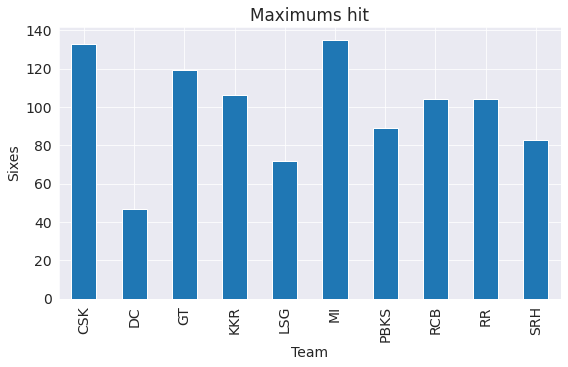

In [150]:
maximum_hits.plot(kind="bar")
plt.title("Maximums hit")
plt.xlabel("Team")
plt.ylabel("Sixes")
plt.show()

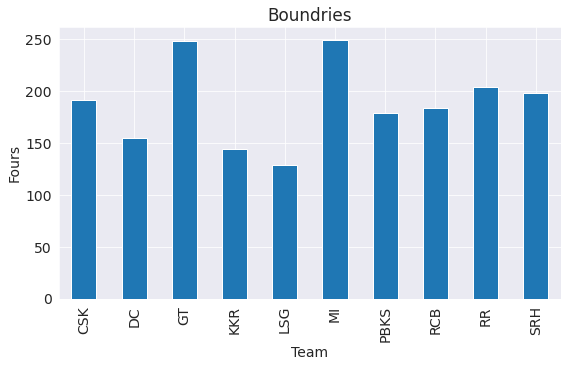

In [151]:
boundries.plot(kind="bar")
plt.title("Boundries")
plt.xlabel("Team")
plt.ylabel("Fours")
plt.show()

Mumbai Indians clearly pimp the finalist team GT as most fours hit in the tournament in total despite of playing less matches

Getting the Run aggregate of each team using the pie chart

# Calculating the total runs accumulated by each team

In [152]:
strike=ultimerge.groupby("Team")["Runs"].sum()
strike

Team
CSK     2547
DC      1635
GT      2817
KKR     1895
LSG     1640
MI      2690
PBKS    1901
RCB     2241
RR      2143
SRH     2178
Name: Runs, dtype: int64

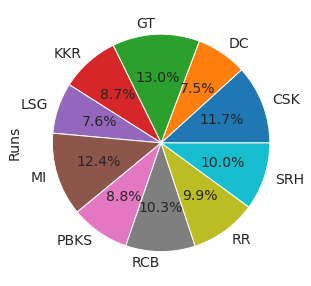

In [153]:
strike.plot(kind="pie",autopct='%1.1f%%');

Tracking the total wickets taken by each team in the tournament we find that GT as a bowling unit was as strong team

Plotting wickets taken by each team in IPL

In [154]:
wicketzone=ultimerge1.groupby("Team")["Wickets"].sum()

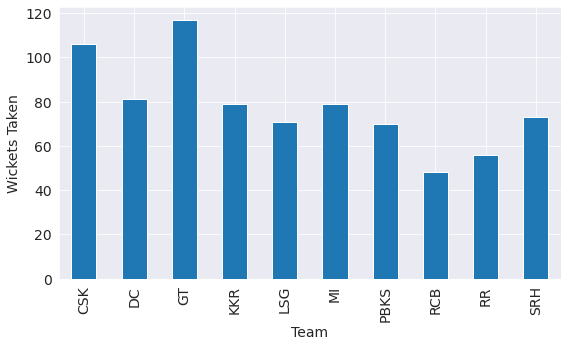

In [155]:
wicketzone.plot(kind="bar");
plt.ylabel("Wickets Taken");

Analysing the number of bowlers used by each team we can observe that KKR and SRH used most bowlers in this 
tournament and that actually tells us alot about the clarity of squad selection in there team was not present.

While on the other hand we also analyse the scoring rates in the IPL each over as it is clear by the heatmap we can actually conclude that since in the middle overs the less runs were scored,hence the game was mostly dictatated ny bowlers in the middle overs. Most teams use the spinners in the middle overs hence it can also be said that spinners were more effective in the tournament

In [156]:
bowlsbowled=ultimerge1.groupby("Team")["Balls bowled"].sum().reset_index()

In [157]:
ultimerge1.groupby("Team")["Player"].count()

Team
CSK      8
DC      11
GT       8
KKR     13
LSG      8
MI      10
PBKS     8
RCB      9
RR       7
SRH     13
Name: Player, dtype: int64

In [158]:
ipl2023

,match_no,ballnumber,inningno,over,outcome,batter,bowler,score
0,1,1,1,0.1,0,Devon Conway,Mohammed Shami,0
1,1,2,1,0.2,1lb,Devon Conway,Mohammed Shami,1
2,1,3,1,0.3,0,Ruturaj Gaikwad,Mohammed Shami,0
3,1,4,1,0.4,1,Ruturaj Gaikwad,Mohammed Shami,1
4,1,5,1,0.5,0,Devon Conway,Mohammed Shami,0
...,...,...,...,...,...,...,...,...
17858,74,95,2,0.1,0,Wriddhiman Saha,Deepak Chahar,0
17859,74,96,2,0.2,0,Wriddhiman Saha,Deepak Chahar,0
17860,74,97,2,0.3,1,Wriddhiman Saha,Deepak Chahar,1
17861,74,98,2,0.4,1,Shubman Gill,Deepak Chahar,1


# Analysing the death overs in the tournament

In [159]:
ipl2023[ipl2023["over"]>17]

,match_no,ballnumber,inningno,over,outcome,batter,bowler,score
103,1,104,1,17.1,w,Ruturaj Gaikwad,Alzarri Joseph,0
104,1,105,1,17.2,1,Ravindra Jadeja,Alzarri Joseph,1
105,1,106,1,17.3,1,Shivam Dube,Alzarri Joseph,1
106,1,107,1,17.4,w,Ravindra Jadeja,Alzarri Joseph,0
107,1,108,1,17.5,1,MS Dhoni,Alzarri Joseph,1
...,...,...,...,...,...,...,...,...
17759,74,113,1,19.2,6,Sai Sudharsan,Matheesha Pathirana,6
17760,74,114,1,19.3,w,Sai Sudharsan,Matheesha Pathirana,0
17761,74,115,1,19.4,1b,Rashid Khan,Matheesha Pathirana,1
17762,74,116,1,19.5,1lb,Hardik Pandya,Matheesha Pathirana,1


From the below heatmap of the runs scored corresponding to each over we can observe that most runs were actually scored in the death overs(17-20) however the purple area between the overs 6 to 12 actually suggest that flow of runs was actually less indirectly suggesting that spinners who mostly bowl in those specific overs were evident into stopping the flow of runs
Also the same fading black colour region in begining (0-2) actually suggests that Batsman in the initial overs were not attacking enough,however due to powerplay being imposed (2-6)they quickly changed gears.

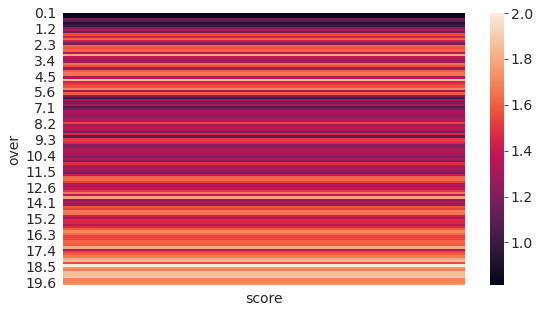

In [160]:
heating=ipl2023.pivot_table(index='over',values='score');
sns.heatmap(heating);

Plotting the performance of each team in the tournament by each player aggregate runs in the tournament we can observe that GT,CSK RCB and MI are most best batting unit in the team as of which they had a great fighting challenge.

In [161]:
#Plotting the graph 

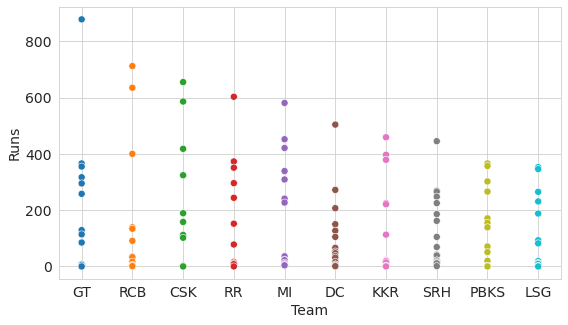

In [189]:
sns.scatterplot(x=ultimerge.Team,y=ultimerge.Runs,hue=ultimerge.Team,s=50)
sns.set_style("whitegrid")
plt.gca().legend().set_visible(False)
plt.show();

Let us save and upload our work to Jovian before continuing

In [190]:
import jovian

In [191]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "darshilshukla/zerotopandas-course-project-starter-darshilshukla" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/darshilshukla/zerotopandas-course-project-starter-darshilshukla


'https://jovian.com/darshilshukla/zerotopandas-course-project-starter-darshilshukla'

## Asking and Answering Questions
Answering some questions on IPL2023 using the dataset that we have prepared and analysed

#### Q1:Find  the best performances by bowler's in death overs in terms or wickets

In [192]:
ipl2023[(ipl2023["outcome"]=="w")&(ipl2023["over"]>17)].groupby("bowler")["outcome"].count().reset_index().sort_values("outcome",ascending=False).head(10)

,bowler,outcome
35,Matheesha Pathirana,20
39,Mohit Sharma,15
50,Sandeep Sharma,11
55,Tushar Deshpande,9
62,Yash Thakur,9
11,Bhuvneshwar Kumar,9
21,Jason Behrendorff,8
49,Sam Curran,8
19,Harshal Patel,8
54,T Natarajan,7


#### Q2:Find the top 10 most boundries scored in the death overs by a player.

In [193]:
ipl2023[(ipl2023["outcome"].isin(["6","4","7nb","5nb"]))&(ipl2023["over"]>17)].groupby("batter")["outcome"].count().reset_index().sort_values("outcome",ascending=False).head(10)

,batter,outcome
70,Rinku Singh,31
81,Shimron Hetmyer,17
68,Ravindra Jadeja,17
89,Tim David,16
78,Shahrukh Khan,16
11,Andre Russell,15
0,Abdul Samad,13
58,Nicholas Pooran,13
48,MS Dhoni,13
29,Dhruv Jurel,13


#### Q3: Write a function that returns or print the score of a specific match number

In [194]:
n=int(input("Enter the match number"))
def Scorecard(n):
    match=ipl2023[ipl2023["match_no"]==n]
    first_total=match[match["inningno"]==1]
    second_total=match[match["inningno"]==2]
    print(first_total["score"].sum(),"/",first_total[first_total["outcome"]=="w"]["outcome"].count())
    print(second_total["score"].sum(),"/",second_total[second_total["outcome"]=="w"]["outcome"].count())
Scorecard(n)

Enter the match number6
217 / 7
205 / 7


In [195]:
match1=ipl2023[ipl2023["match_no"]==1]

In [196]:
match1["score"]

0      0
1      1
2      0
3      1
4      0
      ..
238    4
239    0
240    1
241    6
242    4
Name: score, Length: 243, dtype: int64

In [197]:
CSK_total=match1[match1["inningno"]==1]
GT_total=match1[match1["inningno"]==2]

In [198]:
print("CSK:",CSK_total["score"].sum(),"/",CSK_total[CSK_total["outcome"]=="w"]["outcome"].count())
print("GT:",GT_total["score"].sum(),"/",GT_total[GT_total["outcome"]=="w"]["outcome"].count())

CSK: 178 / 7
GT: 182 / 5


#### Q4: Plot the graph of scores per over for match number and find a function to find and plot the same

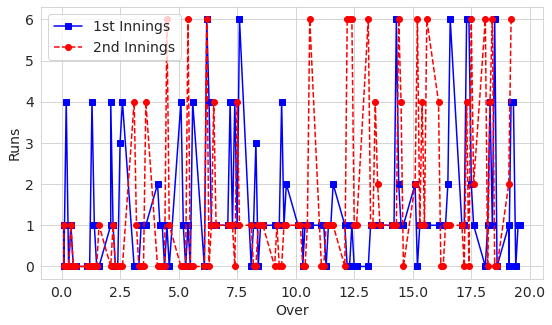

In [199]:
sns.set_style("whitegrid")
plt.plot(ipl2023[(ipl2023["match_no"]==23)&(ipl2023["inningno"]==1)]["over"],ipl2023[(ipl2023["match_no"]==23)&(ipl2023["inningno"]==1)]["score"],'s-b',label="1st Innings");
plt.plot(ipl2023[(ipl2023["match_no"]==23)&(ipl2023["inningno"]==2)]["over"],ipl2023[(ipl2023["match_no"]==23)&(ipl2023["inningno"]==2)]["score"],'o--r',label="2nd Innings");
plt.xlabel("Over");
plt.ylabel("Runs");
plt.legend();

Enter the match number:5


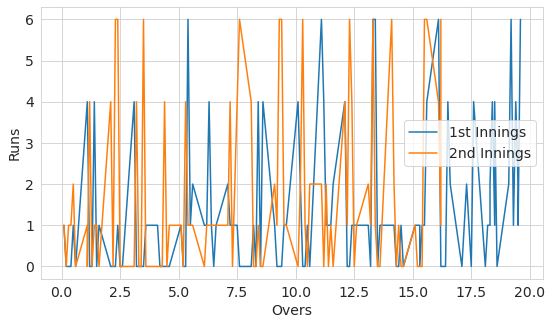

171 / 7
172 / 2


In [200]:
def match_ball(n):
    plt.plot(ipl2023[(ipl2023["match_no"]==n)&(ipl2023["inningno"]==1)]["over"],ipl2023[(ipl2023["match_no"]==n)&(ipl2023["inningno"]==1)]["score"],label="1st Innings");
    plt.plot(ipl2023[(ipl2023["match_no"]==n)&(ipl2023["inningno"]==2)]["over"],ipl2023[(ipl2023["match_no"]==n)&(ipl2023["inningno"]==2)]["score"],label="2nd Innings");
    plt.xlabel("Overs")
    plt.ylabel("Runs")
    plt.legend()
    plt.show();
n=int(input("Enter the match number:"))
match_ball(n)
Scorecard(n)

#### Q5: Find the players who took 3+ wickets and 300 plus runs in tournament

In [201]:
match_winner=pd.merge(ultimerge,ultimerge1,on="Player",how="inner")

In [202]:
match_winner

,Player,Runs,total sixes,total fours,Ball,bowls faced,Strike Rate,Team_x,Wickets,Balls bowled,Overs Bowled,Team_y
0,Cameron Green,421,20,39,0,272,154.78,MI,7,239,40.0,MI
1,Glenn Maxwell,400,31,29,0,225,177.78,RCB,3,64,11.0,RCB
2,Nitish Rana,379,18,36,0,289,131.14,KKR,3,54,9.0,KKR
3,Hardik Pandya,317,13,24,0,242,130.99,GT,4,156,26.0,GT
4,Axar Patel,272,14,21,0,210,129.52,DC,11,288,48.0,DC
...,...,...,...,...,...,...,...,...,...,...,...,...
71,Avesh Khan,0,0,0,0,1,0.00,LSG,8,176,29.0,LSG
72,Mohsin Khan,0,0,0,0,7,0.00,LSG,3,64,11.0,LSG
73,KM Asif,0,0,0,0,2,0.00,RR,3,91,15.0,RR
74,Mohit Sharma,0,0,0,0,1,0.00,GT,31,268,45.0,GT


In [203]:
match_winner=match_winner.drop(columns="Team_y")

In [204]:
match_winner=match_winner.rename(columns={"Team_x":"Team"})

In [205]:
match_winner[(match_winner["Runs"]>300)&(match_winner["Wickets"]>=3)]

,Player,Runs,total sixes,total fours,Ball,bowls faced,Strike Rate,Team,Wickets,Balls bowled,Overs Bowled
0,Cameron Green,421,20,39,0,272,154.78,MI,7,239,40.0
1,Glenn Maxwell,400,31,29,0,225,177.78,RCB,3,64,11.0
2,Nitish Rana,379,18,36,0,289,131.14,KKR,3,54,9.0
3,Hardik Pandya,317,13,24,0,242,130.99,GT,4,156,26.0


Let us save and upload our work to Jovian before continuing.

In [206]:
import jovian

In [207]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "darshilshukla/zerotopandas-course-project-starter-darshilshukla" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/darshilshukla/zerotopandas-course-project-starter-darshilshukla


'https://jovian.com/darshilshukla/zerotopandas-course-project-starter-darshilshukla'

## Inferences and Conclusion

After completing the project I personally made follwoing observation in the data:

1.There has been good batting performance by Mumbai Indians team but there bowling was never upto the mark as comparison to there batting.

2.GT performed good in the IPL because it had balanced both bowling and batting at best rate.

3.Rinku Singh is clearly the new finisher for upcoming Indian team given the way he has performed in the IPL death overs with 31 boundaries.

4.The teams were never actually relying upon the all-rounders after the introduction of impact player rule in this IPL because of reduced number of all round performance in the IPL.

5.DC,SRH were let down by poor batting performances

In [208]:
import jovian

In [209]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "darshilshukla/zerotopandas-course-project-starter-darshilshukla" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/darshilshukla/zerotopandas-course-project-starter-darshilshukla


'https://jovian.com/darshilshukla/zerotopandas-course-project-starter-darshilshukla'

## References and Future Work

 -Few Future works-
 
  Player Clustering and Comparison: Performing clustering techniques onto players based upon there cureent and previous records during each particular season. 
  
Sentiment Analysis and Social Media Impact:Integration of the social buzz about a particular match and the following of a spcific team would give advantage to the sponsers as it will help them too into focusing upon there target audience.

Injury Analysis and Prevention: Incorporation of injury data of players and analisis of it in conjunction with their performance data. This may help in identification of potential correlations between player workload, match conditions, and the likelihood of injuries.Such Insights from this analysis could be used by teams to better manage players' training regimens and reduce the risk of injuries.

 - Our reference for this work includes
For graphs and code reference-https://jovian.com/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-5-data-visualization-with-matplotlib-and-seaborn
For pandas tools and code reference-"https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/"
For more information on numpy and code reference="https://numpy.org/"
For more information on Pandas and code reference="https://pandas.pydata.org/"
For dataset we referred-"https://www.kaggle.com/datasets/sankha1998/ipl2023"
For converting the excel data of team to add in the player info we used openpyxl -"https://openpyxl.readthedocs.io/en/stable/"
For excel data to add team each player played for-"https://www.kaggle.com/datasets/divsiy/ipl-2023-squad-t20-stats"
For verifying my data output and observation we have reffered-"https://www.cricbuzz.com/"

In [210]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "darshilshukla/zerotopandas-course-project-starter-darshilshukla" on https://jovian.com
